Modelo Predictivo Arboles de Decisión

Dataset Red Wine Quality

Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [73]:
# Carga de librerías necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación gráficos en dos dimensiones

# Librerías para implementar modelos de ciencias de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [6]:
# Lectura de datos python y carga en la variable datos

datos = pd.read_csv('C:/Users/Usuario/Desktop/calidad de vino arbol de decision/winequality-red.csv')

In [7]:
datos.info() # Información del conjunto de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
datos.head() # Visual de las primeras 5 filas del conjunto de datos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
datos.isna().sum() # Se valida cuanto valores faltantes hay en total en el conjunto de datos

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

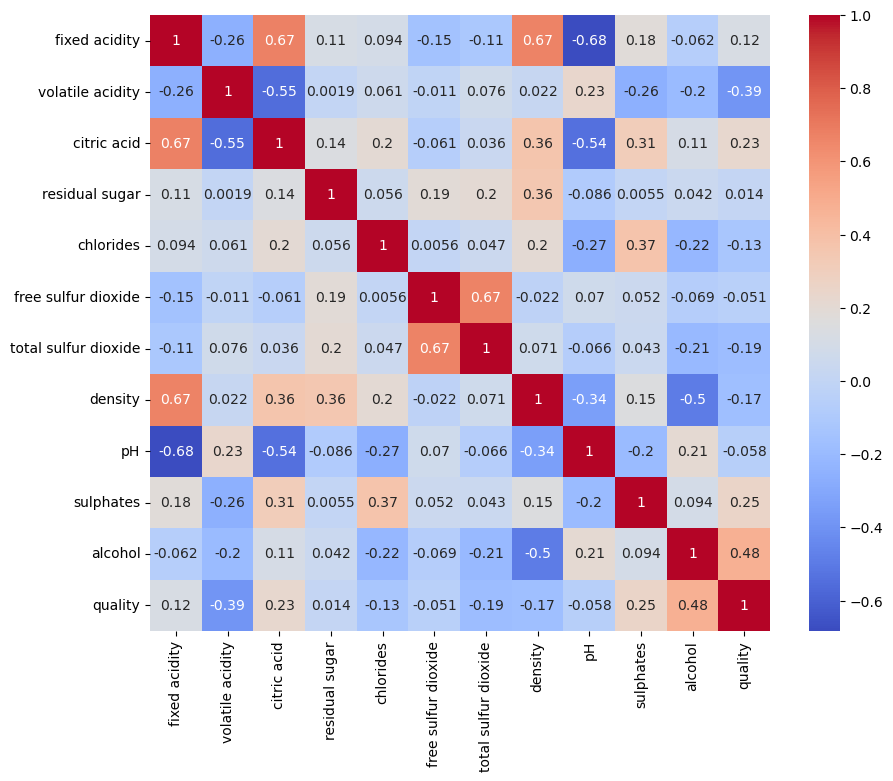

In [10]:
# Se grafica una matriz para ver las correlaciones entre las características

plt.figure(figsize=(10,8))
corr = datos.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

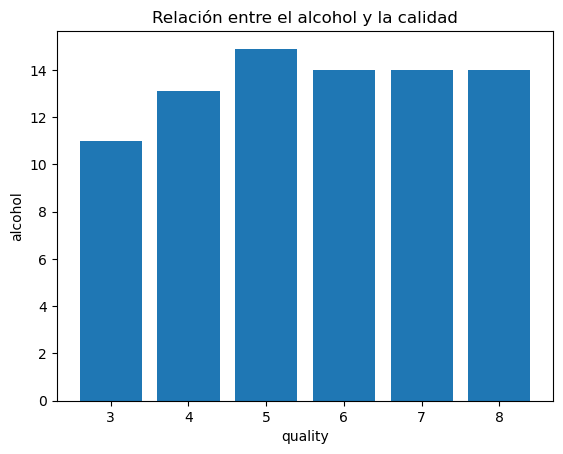

In [11]:
# Mediante un gráfico de barras, miramos los niveles de alcohol en la calidad del vino

plt.bar(datos['quality'], datos['alcohol'])
plt.title('Relación entre el alcohol y la calidad')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

Analisis.
-Si observamos la relación entre la calidad y el nivel de alcohol notamos que aquellos vinos con menor alcohol pertenecen a calidades bajas por lo que un buen vino debe contener alto alcohol.

In [13]:
# Observamos los valores de correlación de la variable quality

correlacion_calidad = corr['quality'].sort_values(ascending = False)
print(correlacion_calidad)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [14]:
# Permite visualizar las columnas del conjunto de datos

datos.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

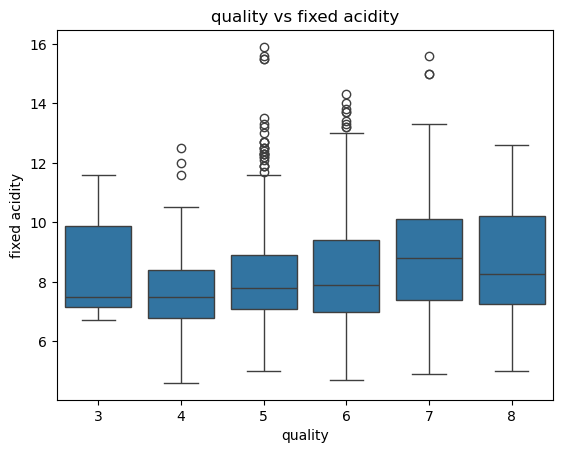

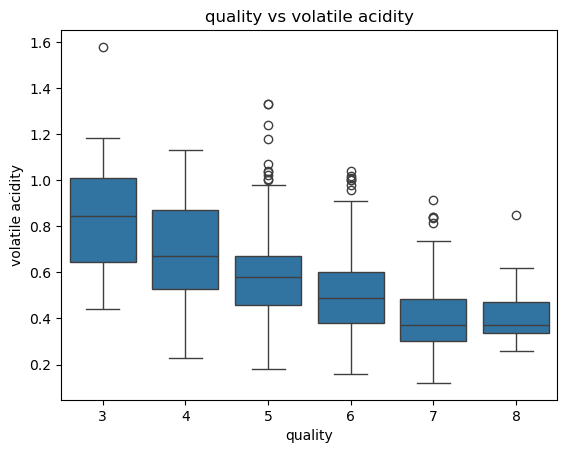

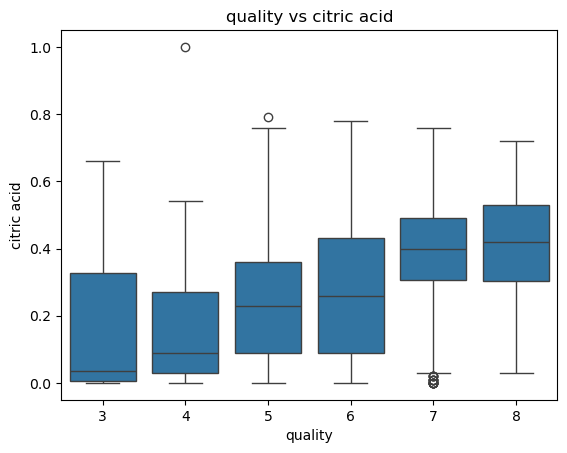

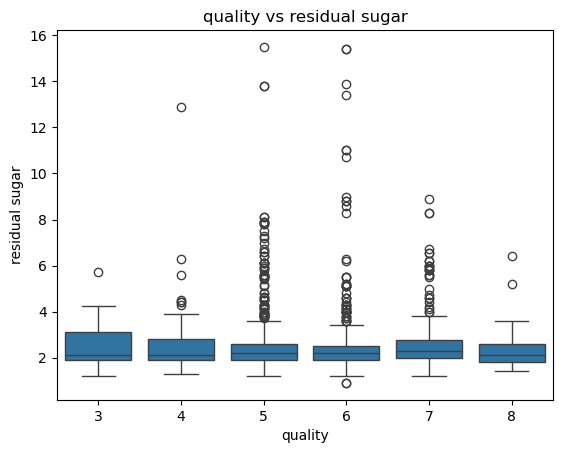

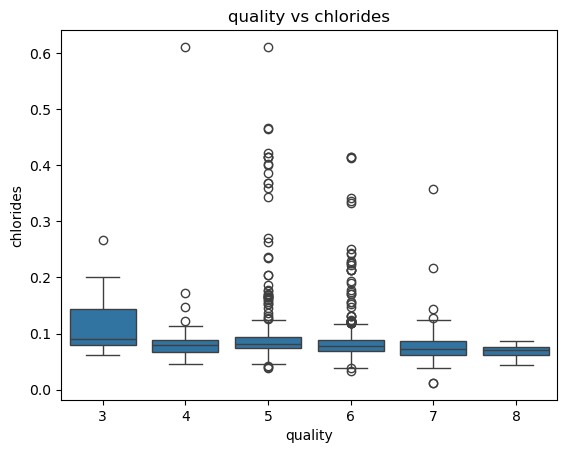

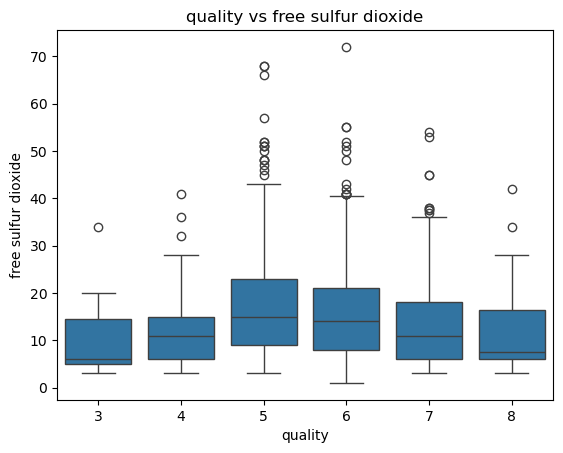

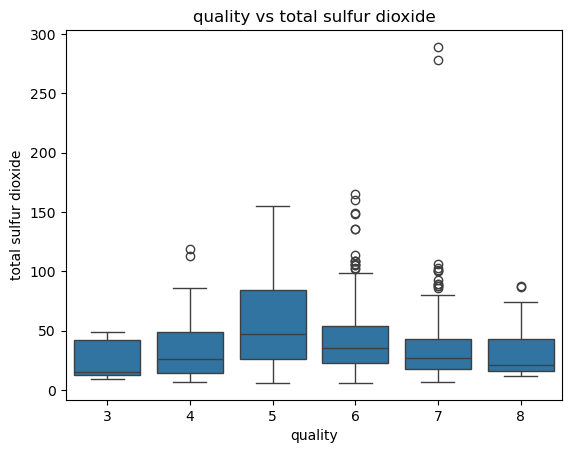

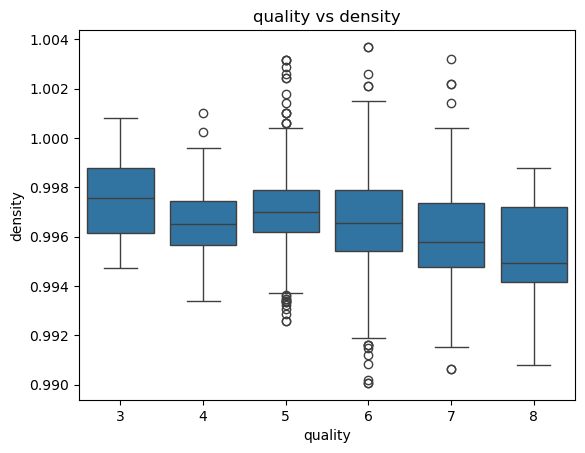

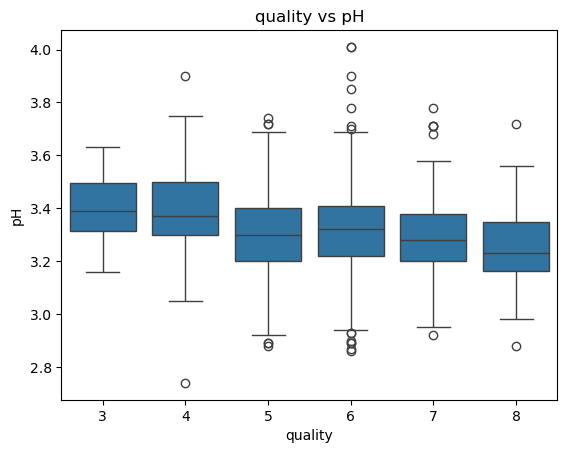

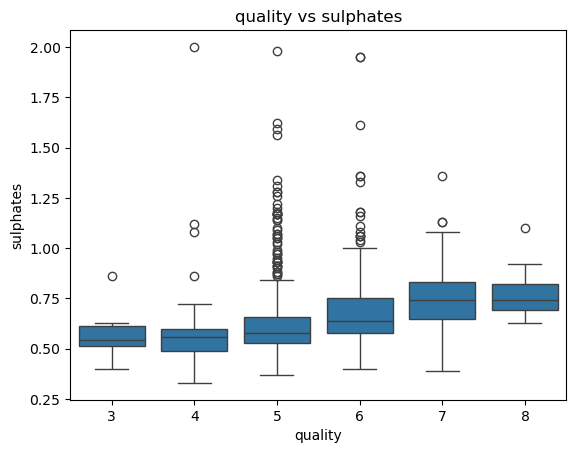

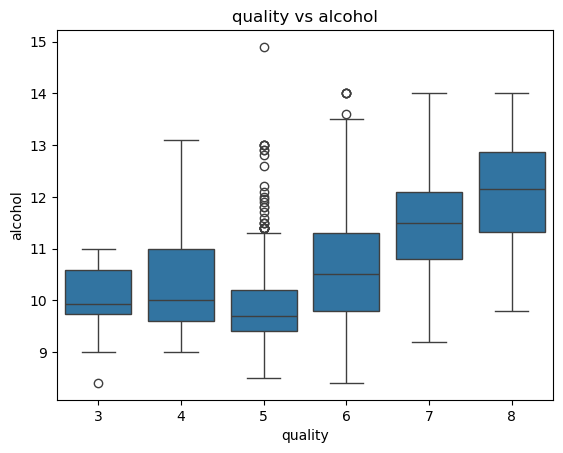

In [15]:
# Se almacenan las columnas en una variable 

columnas = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']

# Nos permite graficar las columnas para visualizar el comportamiento de los valores

for columna in columnas:
    sns.boxplot(data=datos, x='quality', y=columna)
    plt.title(f'quality vs {columna}')
    plt.show()

Analisis.
-Observamos que se presentan valores atípicos cuando realizamos la comparación de la calidad con las diferentes variables por lo cual para evitar que las variables con rangos más amplios dominen el análisis se decide realizar una normalización.

Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [18]:
# Nos permite realizar una normalización de los datos para poder tener una distribución uniforme

escala = MinMaxScaler(feature_range=(0, 1))
normal_datos = escala.fit_transform(datos)
normal_datos = pd.DataFrame(normal_datos, columns = datos.columns)
print(normal_datos.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.21538

Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [25]:
# Realizamos la creación de una columna para la clasificación de los datos,
# para poder generar 'si' o 'no' al predecir la calidad del vino

datos['Vino bueno'] = ['si' if i >= 7 else 'no' for i in datos['quality']]

In [26]:
# Creamos en 'x' las características del conjunto de datos normalizado quitando la variable calidad
# Creamos en 'y' la igualdad a la variable recién creada 'Vino bueno' con el conjunto de datos original

x = normal_datos.drop(["quality"], axis = 1)
y = datos['Vino bueno']

In [27]:
# Visualizamos la cantidad de vino que hay

y.value_counts()

Vino bueno
no    1382
si     217
Name: count, dtype: int64

Analisis.
-Se puede ver que hay un desequilibrio en las muestras al contar con 1382 vinos considerados como no buenos lo que implica una afectación a los modelos de aprendizaje, ya que se pueden presentar dificultades para predecir correctamente la clase minoritaria ("sí")

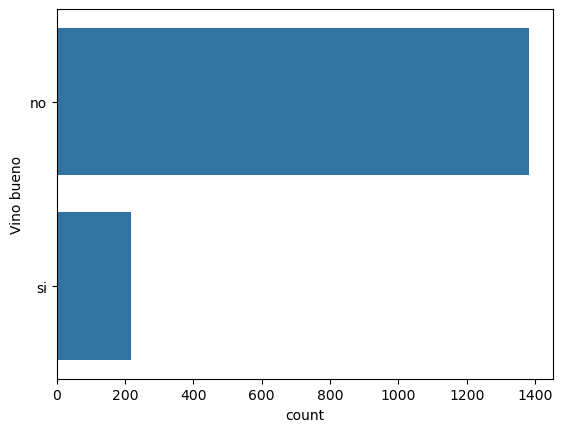

In [29]:
# Graficamos los valores

sns.countplot(y)
plt.show()

Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [31]:
# Realizamos la división de conjunto de datos teniendo presente usar 'stratify=y'
# para asegurar la proporción de 'si' y 'no'

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2020, stratify=y)

Entrenar el modelo configurando los diferentes hiperparámetros.

In [33]:
# Ajustamos los datos para el modelo de árbol de decisión

datos = DecisionTreeClassifier(random_state=2020)
datos.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2020)

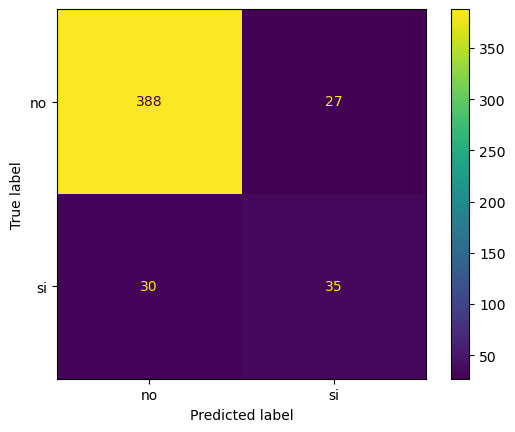

Precisión: 0.88125


In [34]:
# Realizamos la predicción del conjunto de datos de prueba
y_prediccion = datos.predict(x_test)

# Graficamos la matrix de confusión
ConfusionMatrixDisplay.from_estimator(datos, x_test, y_test)
plt.show()

# Mostramos el puntaje de precisión
precision = accuracy_score(y_test, y_prediccion)
print(f"Precisión: {precision}")

Analisis
-Después de realizar la división de los datos y teniendo en consideración la proporción de los 'si' y 'no' podemos observar la matrix de confusión y una precisión del 0.88 indicando que la predicción general de datos correctos es de un 88%, sin embargo, se debe tener presente el desequilibrio de clases donde más muestras de "no".

In [36]:
# Alistamos la variable con el modelo de árbol

tree = DecisionTreeClassifier()

In [37]:
# Entrenamos el árbol

arbol = tree.fit(x_train, y_train)

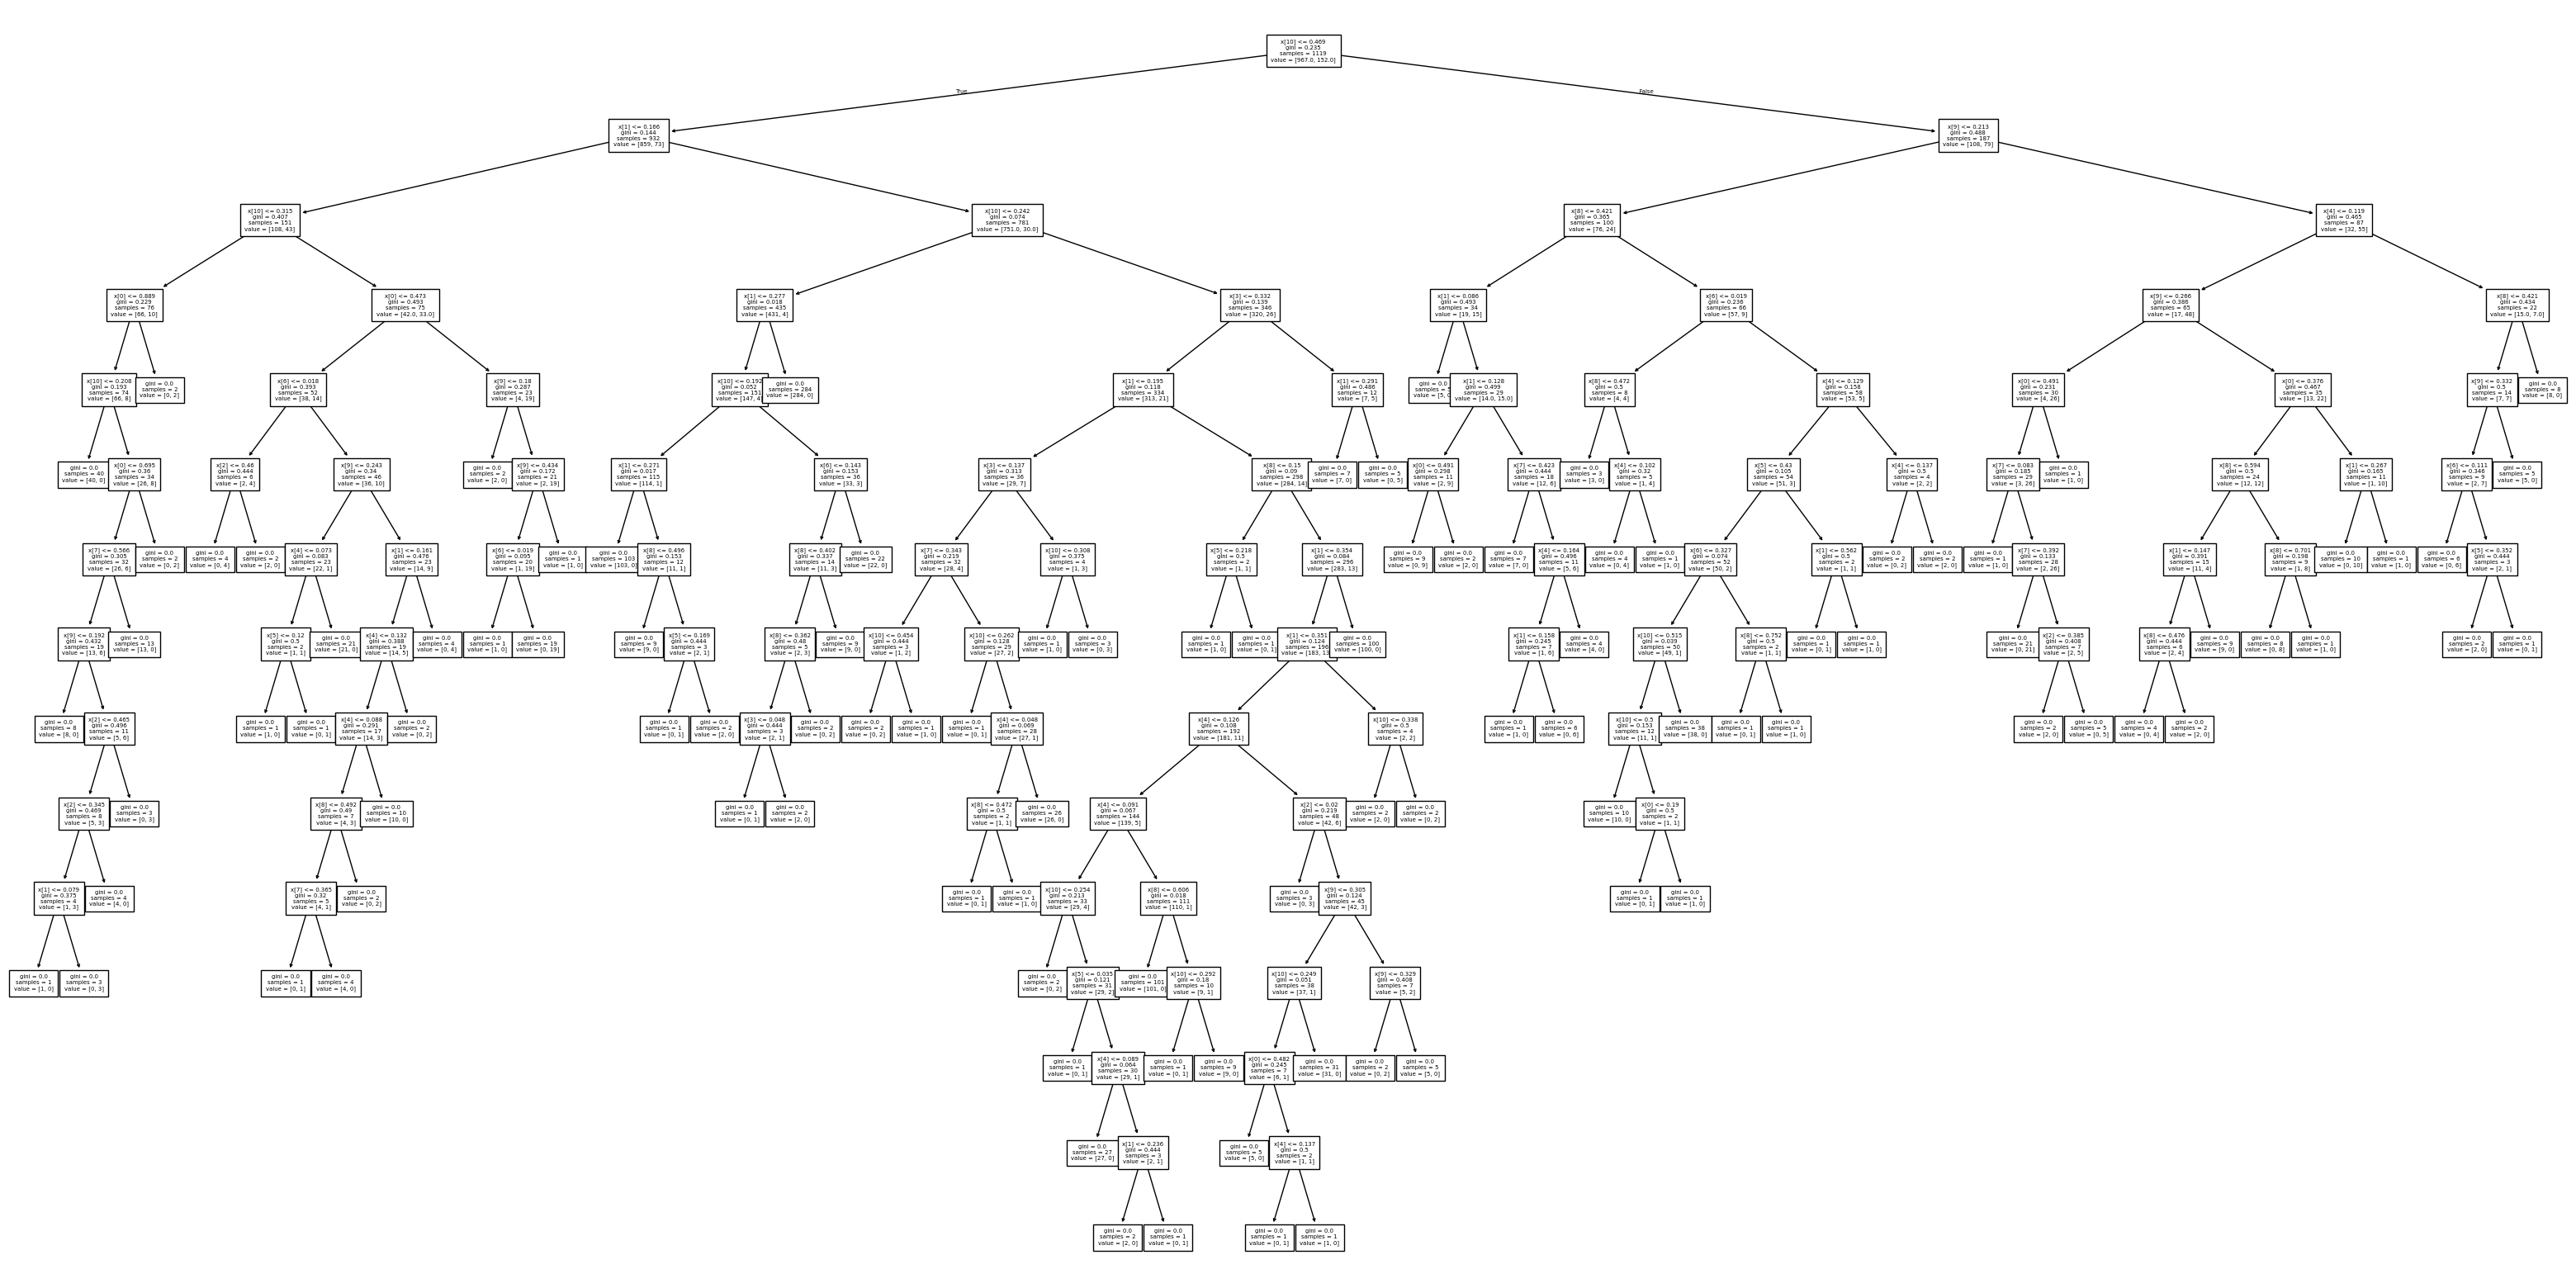

In [39]:
# Mostramos el grafico del árbol

plt.figure(figsize=(40,20))
plot_tree(arbol, fontsize=5)
plt.show()

In [67]:
# Obtenemos la puntuación de validación cruzada

scores = cross_val_score(datos, x, y, cv=5)
print("Puntuación de validación cruzada: ", scores.mean())

Puntuación de validación cruzada:  0.8054917711598746


In [41]:
# Obtenemos la precisión de los datos de entrenamiento
y_pred_train = datos.predict(x_train)
print(metrics.accuracy_score(y_train, y_pred_train))

1.0


In [42]:
# Para corregir el sobre ajuste se realiza una poda de hiperparámetros,
# definiendo el máximo de profundidad y características, además se encuentra los mejores parámetros mediante GridSearchCV

param_dist = {"max_depth": range(1,6),
"max_features": range(1,10),
"criterion": ["gini", "entropy"]}
datos_cv = GridSearchCV(datos, param_dist, cv=5)
datos_cv.fit(x_train,y_train)
print(datos_cv.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'max_features': 8}


In [44]:
# Se crea un nuevo árbol de decisión usando los mejores parámetros y reduciendo el máximo de profundidad y características

datos_new = DecisionTreeClassifier(criterion = "gini",
max_depth = 2,
max_features = 8,
random_state = 2020)
datos_new.fit(x_train, y_train)
y_pred_new = datos_new.predict(x_test)
print('Precisión del árbol de decisiones: ', metrics.accuracy_score(y_test, y_pred_new))
scores = cross_val_score(datos_new, x, y, cv=5)
print('Puntuación de validación cruzada: ', scores.mean())

Precisión del árbol de decisiones:  0.8854166666666666
Puntuación de validación cruzada:  0.8786794670846394


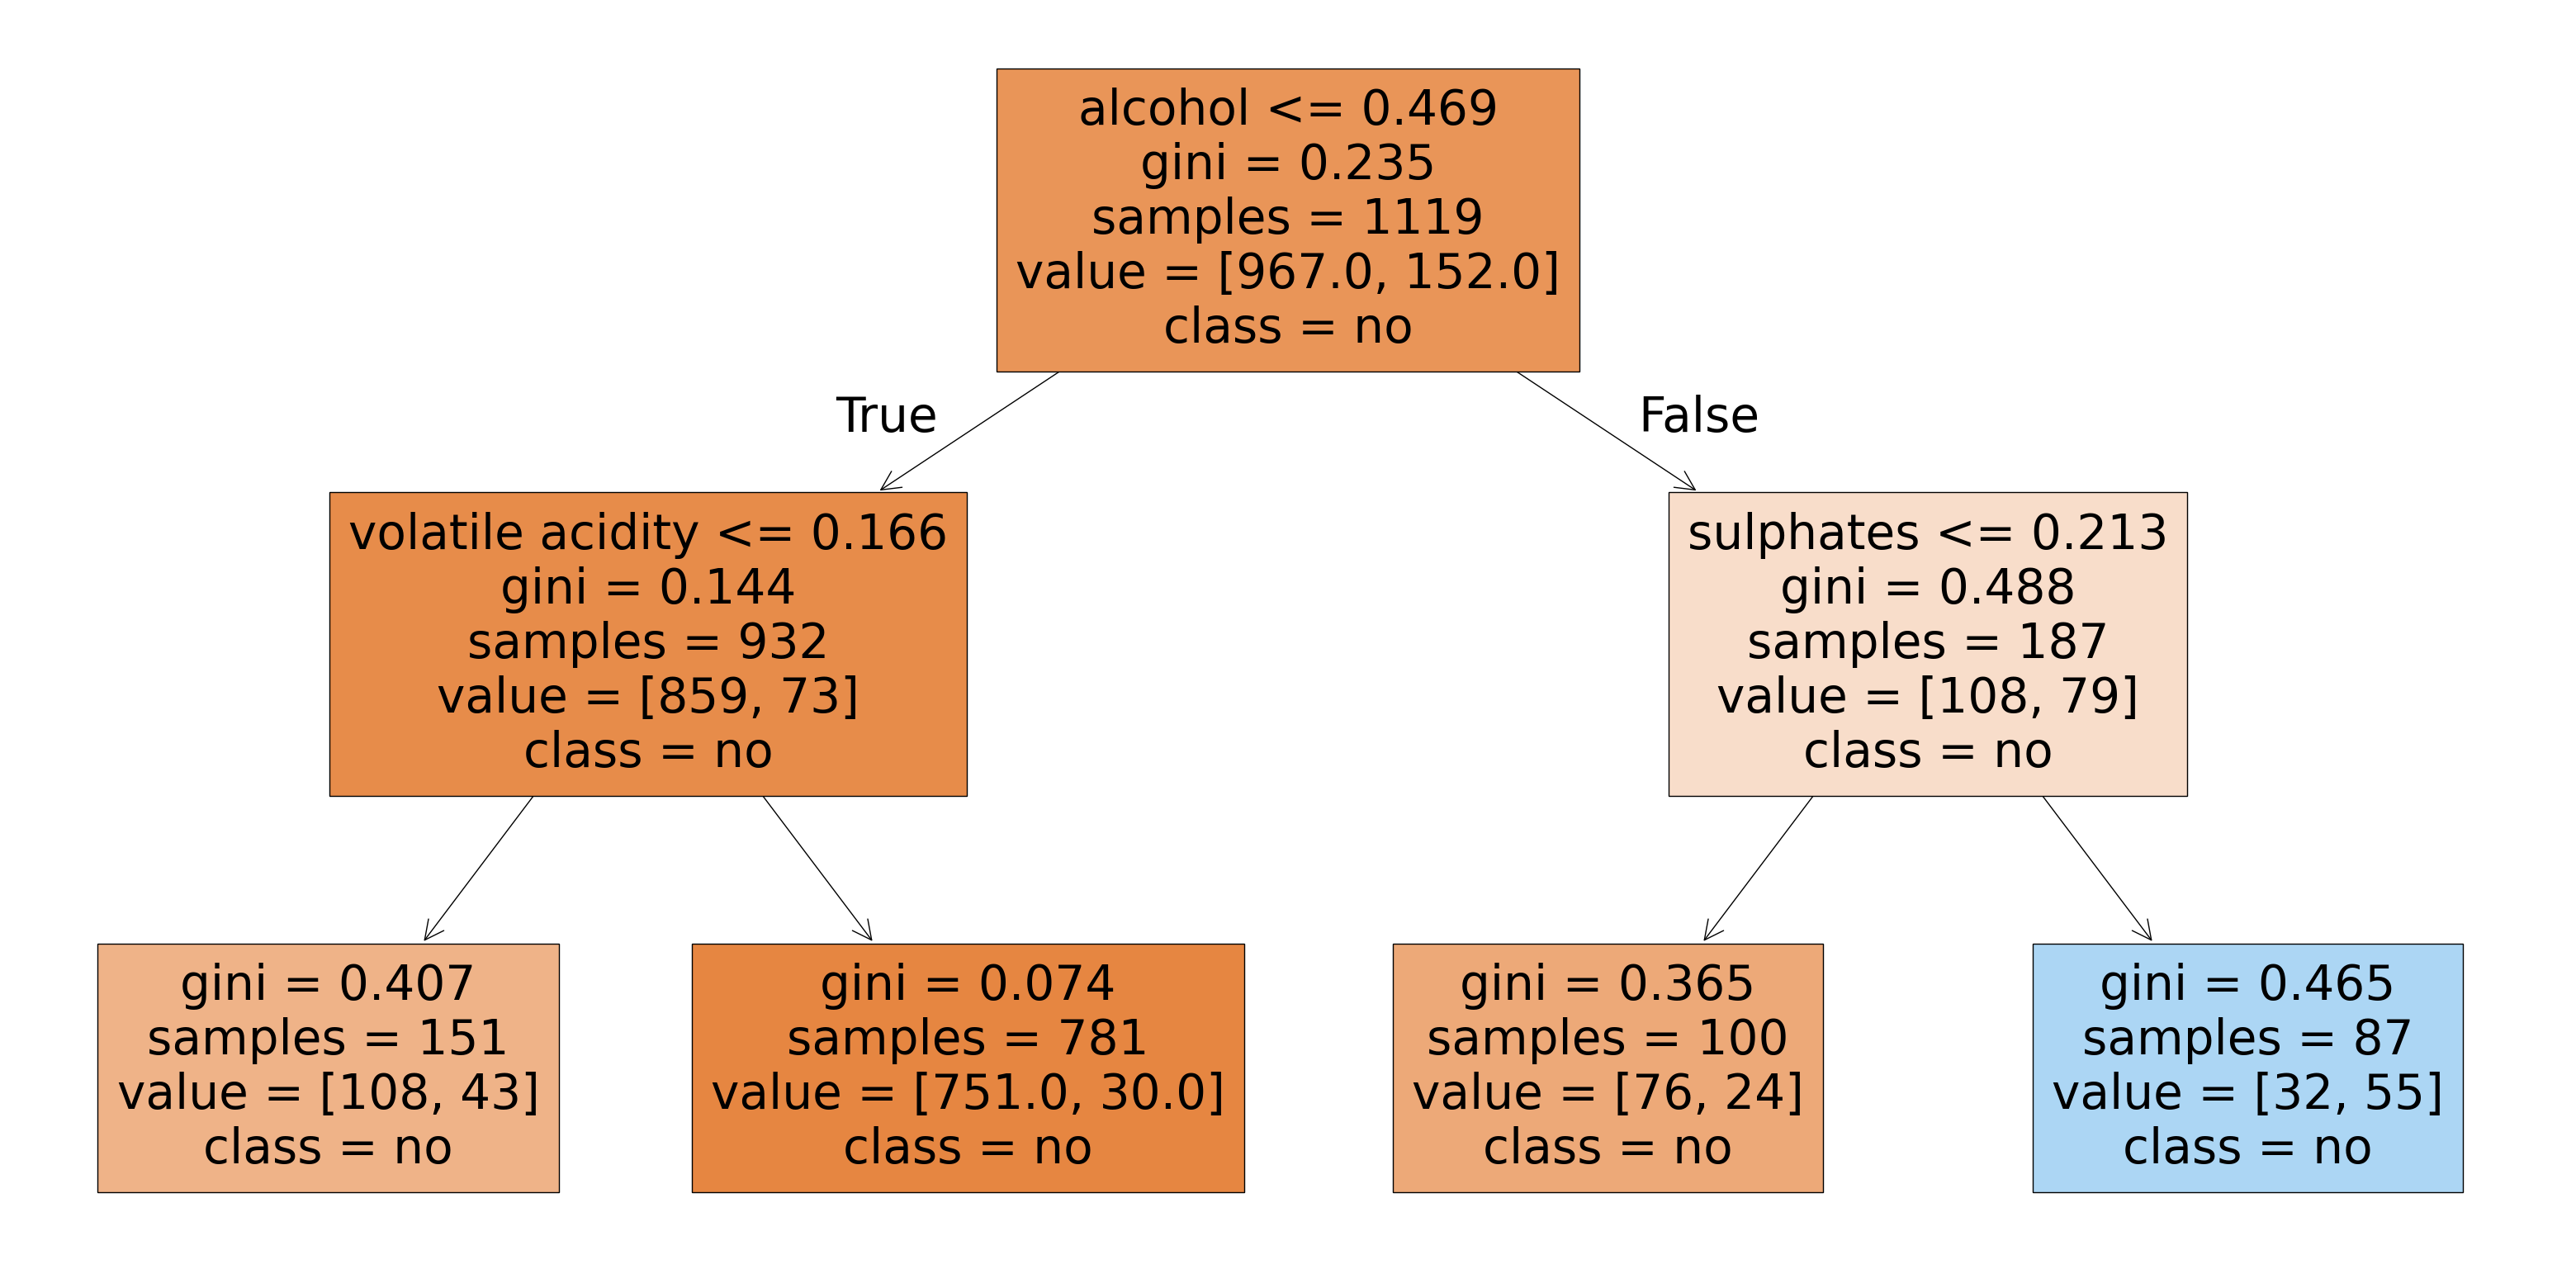

In [47]:
# Visualizamos el nuevo árbol de decisiones

plt.figure(figsize=(40, 20))
plot_tree(datos_new, filled=True, feature_names=x.columns.to_list(), class_names=y)
plt.show()

Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [49]:
predicciones = datos_new.predict(x_test)

In [50]:
accuracy = accuracy_score(y_test, predicciones)
accuracy

0.8854166666666666

In [51]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.8699107426371359

In [57]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.8854166666666666

In [61]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.8722034511145601

Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

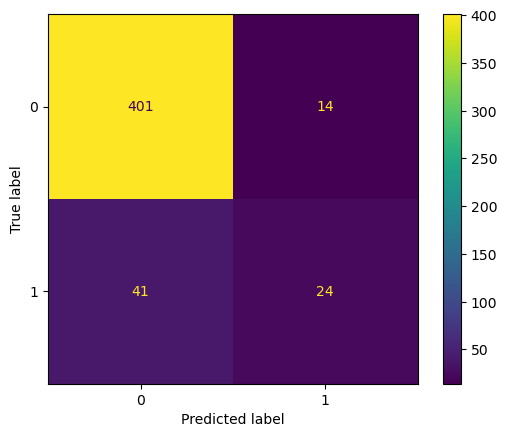

In [79]:
cm=confusion_matrix(y_test, predicciones)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()